In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Datasets/df_preprocessed.csv')
df = df.drop(['DAY_OF_WEEK', 'DAY_OF_MONTH', 'MONTH'], axis=1)
df.head()


,Unnamed: 0,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,...,Drizzle,Snow,Wintry Mix,Freezing Rain,MONTH_sin,MONTH_cos,DAY_OF_MONTH_sin,DAY_OF_MONTH_cos,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos
0,0,3,10,0,124,636,324,448,48,30,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
1,1,3,28,0,371,2475,340,531,48,30,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
2,2,3,20,1,181,1069,301,482,48,30,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
3,3,3,30,0,168,944,345,513,48,30,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
4,4,4,1,0,139,760,360,499,46,28,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521


In [ ]:
X = df.drop(['DEP_DELAY'], axis=1)
y = df['DEP_DELAY']
y = y.ravel()
print(X.shape, y.shape)


(28820, 32) (28820,)


In [ ]:
#smote
sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X, y)
print(X.shape, y.shape)

(49892, 32) (49892,)


In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#boruta feature selection
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter=25)

(39913, 32) (39913,)
(9979, 32) (9979,)


In [ ]:
# !pip install numpy==1.19.3

In [ ]:
feat_selector.fit(X_train, y_train)

X_train = feat_selector.transform(X_train)

X_test = feat_selector.transform(X_test)

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	9 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	10 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	11 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	12 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	13 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	14 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	15 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	16 / 25
Confirmed: 	27
Tentative: 	2
Rejected: 	3
Iteration: 	17 / 

C:\Users\Vartika\AppData\Local\Programs\Python\Python310\lib\site-packages\boruta\boruta_py.py:319: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.support_ = np.zeros(n_feat, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [8]:
#knn, randomforest, logistic regression, decision tree, gaussian naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
models = [KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]
dic = {}
i = 0
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #accuracy precision, recall f1 score
    if(i == 0):
        print('KNN', end = ' ')
    elif(i == 1):
        print('Random Forest', end = ' ')
    elif(i == 2):
        print('Logistic Regression', end = ' ')
    elif(i == 3):
        print('Decision Tree', end = ' ')
    elif(i == 4):
        print('Gaussian Naive Bayes', end = ' ')
    i += 1
    dic[model] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
    print(accuracy_score(y_test, y_pred), end = ' ')
    print(precision_score(y_test, y_pred), end = ' ')
    print(recall_score(y_test, y_pred), end = ' ')
    print(f1_score(y_test, y_pred), end = ' ')
    print()

KNN 0.8478805491532218 0.7950680272108843 0.9372493985565357 0.8603238866396761 
Random Forest 0.9421785750075158 0.9574777017216345 0.92542101042502 0.9411764705882353 
Logistic Regression 0.6607876540735544 0.6693429114726389 0.6351242983159583 0.6517847958029009 
Decision Tree 0.8860607275278084 0.8848690785528682 0.8875300721732157 0.886197577820038 
Gaussian Naive Bayes 0.6238100010021044 0.5832433890987587 0.8666800320769847 0.697258064516129 


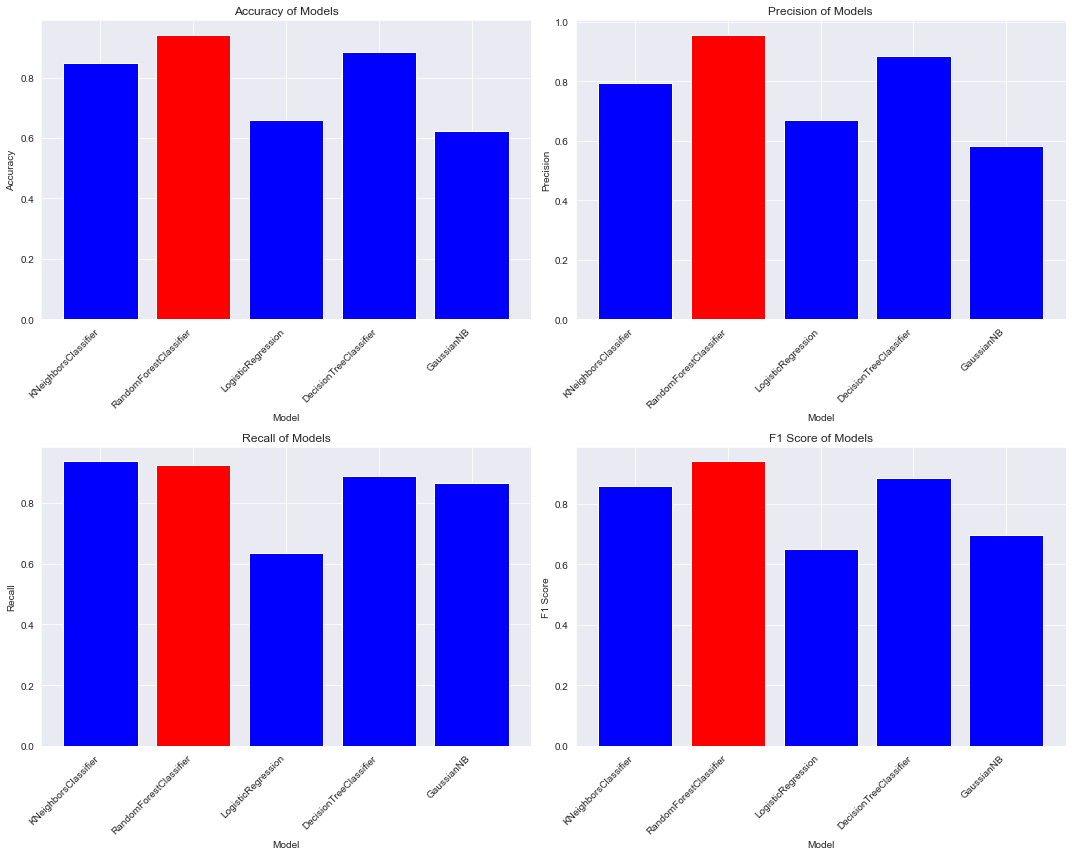

In [22]:
import matplotlib.pyplot as plt

# Assuming dic is your dictionary containing model performance metrics

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))


colors = {'RandomForestClassifier': 'red', 'OtherModel': 'blue', 'AnotherModel': 'blue'}  # Update with your actual model names

# Plot Accuracy
model_names = [model.__class__.__name__ for model in dic]
bars_acc = axes[0, 0].bar(range(len(dic)), [dic[model][0] for model in dic], align='center', color=[colors.get(name, 'blue') for name in model_names])
axes[0, 0].set_xticks(range(len(dic)))
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy of Models')

# Plot Precision
bars_precision = axes[0, 1].bar(range(len(dic)), [dic[model][1] for model in dic], align='center', color=[colors.get(name, 'blue') for name in model_names])
axes[0, 1].set_xticks(range(len(dic)))
axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision of Models')

# Plot Recall
bars_recall = axes[1, 0].bar(range(len(dic)), [dic[model][2] for model in dic], align='center', color=[colors.get(name, 'blue') for name in model_names])
axes[1, 0].set_xticks(range(len(dic)))
axes[1, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Recall of Models')

# Plot F1 Score
bars_f1 = axes[1, 1].bar(range(len(dic)), [dic[model][3] for model in dic], align='center', color=[colors.get(name, 'blue') for name in model_names])
axes[1, 1].set_xticks(range(len(dic)))
axes[1, 1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_title('F1 Score of Models')

# Add white text on top of bars
# for bars, metric_name in zip([bars_acc, bars_precision, bars_recall, bars_f1], ['Accuracy', 'Precision', 'Recall', 'F1 Score']):
#     for bar in bars:
#         yval = bar.get_height()
#         plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='red')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [23]:
# save the above plot as a png file
fig.savefig('images/baseline_performance.png')